In [38]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler




In [28]:
file_path = 'C:\\Users\\ASUS\\Documents\\ds_salary_proj\\Cleaned_DS_Jobs.csv'

df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# display(df)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154,NY,1,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154,VA,0,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,MA,1,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154,MA,0,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154,NY,1,22,1,1,0,0,0,0,0,data scientist,na


Coefficient de pente (m) : -2.272242033566172
Intercept (b) : 131.76361736799186


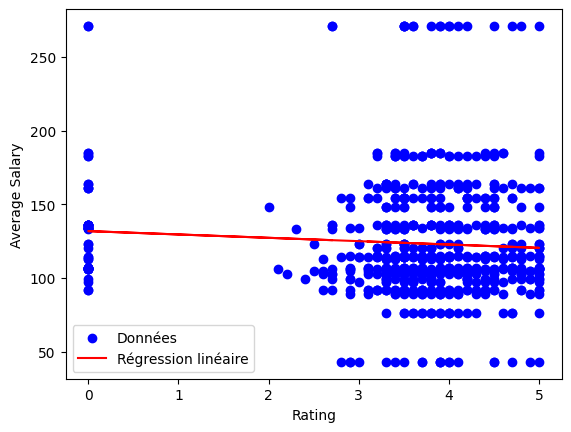

In [21]:

# Supprimer les lignes contenant des valeurs manquantes dans les colonnes 'Rating' et 'avg_salary'
df.dropna(subset=['Rating', 'avg_salary'], inplace=True)

# Séparer les variables indépendantes (X) et dépendantes (y)
X = df[['Rating']]
y = df['avg_salary']

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données
model.fit(X, y)

# Obtenir les coefficients du modèle
coefficient = model.coef_[0]
intercept = model.intercept_

# Afficher les résultats
print("Coefficient de pente (m) :", coefficient)
print("Intercept (b) :", intercept)

# Prédire les valeurs en utilisant le modèle
predictions = model.predict(X)

# Tracer la régression linéaire
plt.scatter(X, y, color='b', label='Données')
plt.plot(X, predictions, color='r', label='Régression linéaire')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.legend()
plt.show()


In [29]:
df.dropna(subset=['Rating', 'avg_salary'], inplace=True)

# Séparer les variables indépendantes (X) et dépendantes (y)
X = df[['Rating']]
y = df['avg_salary']

# Créer un modèle de régression linéaire
model = LinearRegression()

# Utiliser la validation croisée k-fold avec k=5
k_fold = KFold(n_splits=5)

# Liste pour stocker les scores de validation
scores = []

# Boucle sur les splits de la validation croisée
for train_indices, val_indices in k_fold.split(X):
    X_train, X_val = X.iloc[train_indices], X.iloc[val_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]

    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)

    # Évaluer le modèle sur l'ensemble de validation
    score = model.score(X_val, y_val)
    scores.append(score)

# Calculer le coefficient de détermination R² moyen
r2_mean = np.mean(scores)

print("Scores de validation :", scores)
print("Score moyen de validation (R²) :", r2_mean)


Scores de validation : [-0.1268460551602899, -2.2239644540599546, -0.5910488273968957, -0.011037157935599229, -0.06097900076417884]
Score moyen de validation (R²) : -0.6027750990633838


In [36]:

# Supprimer les lignes contenant des valeurs manquantes dans les colonnes 'Rating' et 'avg_salary'
df.dropna(subset=['Rating', 'avg_salary'], inplace=True)

# Séparer les variables indépendantes (X) et dépendantes (y)
X = df[['Rating']]
y = df['avg_salary']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer un modèle de régression Lasso
alpha = 1.0  # Paramètre de pénalisation, ajustez selon vos besoins
model = Lasso(alpha=alpha)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

# Obtenir les coefficients du modèle
coefficients = model.coef_[0]
intercept = model.intercept_

# Afficher les résultats
print("Coefficient de pente (m) :", coefficients)
print("Intercept (b) :", intercept)

# Prédire les valeurs en utilisant le modèle sur l'ensemble de test
predictions = model.predict(X_test_scaled)

# Afficher le score R² du modèle sur l'ensemble de test
r_squared = model.score(X_test_scaled, y_test)
print("Score R² sur l'ensemble de test :", r_squared)


Coefficient de pente (m) : -1.8423309237469228
Intercept (b) : 124.18939393939394
Score R² sur l'ensemble de test : -0.002865258238183399


In [39]:


# Supprimer les lignes contenant des valeurs manquantes dans les colonnes 'Rating' et 'avg_salary'
df.dropna(subset=['Rating', 'avg_salary'], inplace=True)

# Séparer les variables indépendantes (X) et dépendantes (y)
X = df[['Rating']]
y = df['avg_salary']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer un modèle de régression linéaire
model_linear = LinearRegression()

# Définir la grille des hyperparamètres à rechercher avec GridSearchCV (ici, il n'y en a pas pour la régression linéaire)
param_grid = {}

# Créer l'objet GridSearchCV avec le modèle et les hyperparamètres à rechercher
grid_search_linear = GridSearchCV(model_linear, param_grid, cv=5)

# Entraîner le modèle avec la recherche par validation croisée
grid_search_linear.fit(X_train_scaled, y_train)

# Obtenir le meilleur modèle trouvé avec les meilleurs hyperparamètres
best_model_linear = grid_search_linear.best_estimator_

# Afficher le score R² du meilleur modèle sur l'ensemble de test
r_squared_linear = best_model_linear.score(X_test_scaled, y_test)
print("Score R² sur l'ensemble de test de la régression linéaire :", r_squared_linear)


Score R² sur l'ensemble de test de la régression linéaire : -0.0032874980211821114


In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Supprimer les lignes contenant des valeurs manquantes dans les colonnes 'Rating' et 'avg_salary'
df.dropna(subset=['Rating', 'avg_salary'], inplace=True)

# Séparer les variables indépendantes (X) et dépendantes (y)
X = df[['Rating']]
y = df['avg_salary']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer un modèle de régression Lasso
lasso = Lasso()

# Définir les hyperparamètres à rechercher avec GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]  # Valeurs possibles pour le paramètre d'alpha
}

# Créer l'objet GridSearchCV avec le modèle et les hyperparamètres à rechercher
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5)

# Entraîner le modèle avec la recherche par validation croisée
grid_search_lasso.fit(X_train_scaled, y_train)

# Obtenir le meilleur modèle trouvé avec les meilleurs hyperparamètres
best_model_lasso = grid_search_lasso.best_estimator_

# Afficher le score R² du meilleur modèle sur l'ensemble de test
r_squared_lasso = best_model_lasso.score(X_test_scaled, y_test)
print("Score R² sur l'ensemble de test de la régression Lasso :", r_squared_lasso)


Score R² sur l'ensemble de test de la régression Lasso : -0.006071023966745415


In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score

# Supprimer les lignes contenant des valeurs manquantes dans les colonnes 'Rating' et 'avg_salary'
df.dropna(subset=['Rating', 'avg_salary'], inplace=True)

# Séparer les variables indépendantes (X) et dépendantes (y)
X = df[['Rating']]
y = df['avg_salary']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer les modèles de régression linéaire et de régression Lasso
model_linear = LinearRegression()
model_lasso = Lasso(alpha=1.0)  # Utilisez les meilleurs hyperparamètres trouvés précédemment

# Créer le modèle de stacking avec les modèles individuels
estimators = [
    ('linear', model_linear),
    ('lasso', model_lasso)
]

# Le régresseur d'ensemble avec les modèles individuels et le modèle final (Régression linéaire ici)
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Entraîner le modèle de stacking sur les données d'entraînement
stacking_model.fit(X_train_scaled, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Calculer le score R² du modèle de stacking sur l'ensemble de test
r2_stacking = r2_score(y_test, y_pred_stacking)
print("Score R² du modèle de stacking sur l'ensemble de test :", r2_stacking)


Score R² du modèle de stacking sur l'ensemble de test : -0.0036234389024007996


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Séparer les caractéristiques (X) et la cible (y)
X = df[['Rating']]
y = df['avg_salary']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les modèles à évaluer avec leurs hyperparamètres à rechercher
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [None, 5, 10, 15]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
    },
    'Support Vector Machine': {
        'model': SVR(),
        'params': {'C': [1, 10, 100], 'kernel': ['linear', 'rbf']}
    }
}

# Liste pour stocker les modèles et leurs scores
best_models = {}
best_scores = {}

# Recherche des meilleurs hyperparamètres et évaluation des performances pour chaque modèle
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = -grid_search.best_score_

# Trouver le modèle avec le score le plus bas (meilleur score)
meilleur_modele = min(best_scores, key=best_scores.get)
modele_le_plus_robuste = best_models[meilleur_modele]

# Afficher le score du modèle le plus robuste
print("Meilleur modèle:", meilleur_modele)
print("Score du modèle le plus robuste:", best_scores[meilleur_modele])

# Vous pouvez maintenant utiliser 'modele_le_plus_robuste' pour faire des prédictions sur de nouvelles données.


Meilleur modèle: Linear Regression
Score du modèle le plus robuste: 1639.555511686992
